In [22]:
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
mirex = pd.read_csv("MIREX_RESULTS_2005-2019_RAW_DATA.csv")
data = mirex
# append data from papers
paper_data = [
    ["kd",0.46,0.494,0.665,0.0,0.0,"Karin Dressler","ORCHSET",2009],
    ["dr1",0.626,0.669,0.806,0.0,0.0,"Jean-Louis Durrieu, Gaël Richard, Bertrand David","ORCHSET",2009],
    ["dr2",0.626,0.669,0.806,0.0,0.0,"Jean-Louis Durrieu, Gaël Richard, Bertrand David","ORCHSET",2009],
    ["SG1",0.235,0.284,0.57,0.603481,0.385220,"Justin Salamon, Emilia Gómez","ORCHSET",2011],
    ["SG2",0.235,0.284,0.57,0.603481,0.385220,"Justin Salamon, Emilia Gómez","ORCHSET",2011],
]
data = data.append(pd.DataFrame(paper_data, columns=data.columns))
data["Contributor_Year"] = data.Contributors+" ("+data.Year.astype(str)+")"
data["Contributor_Year_Algo"] = data.Contributors+" ("+data.Year.astype(str)+")"+", "+data.Algorithm

/home/jirka/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



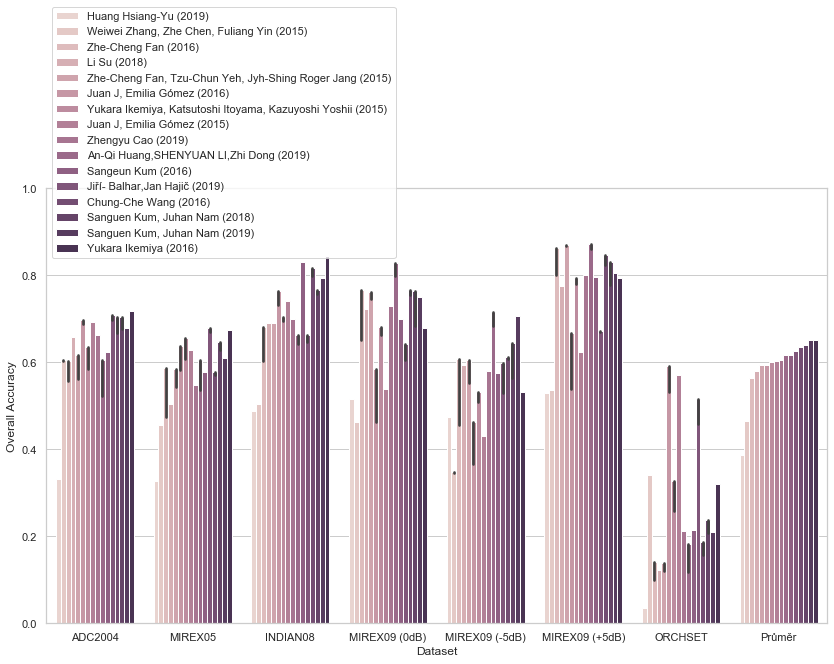

In [24]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,8)})
sns.set(style="whitegrid")
filtered = data
filtered = data[(data.Year >= 2015)]
#filtered = data[data.Dataset != "ORCHSET"]
#filtered = filtered[filtered.Dataset != "MIREX09 (-5dB)"]
#filtered = filtered[filtered.Dataset != "MIREX09 (+5dB)"]

# filtered = filtered[data.Contributor_Year_Algo.isin([
#     "Karin Dressler (2009), kd",
#     "Jean-Louis Durrieu, Gaël Richard, Bertrand David (2009), dr1",
#     "Justin Salamon, Emilia Gómez (2011), SG2",
#     "Juan J, Emilia Gómez (2016), BG2",
#     "Yukara Ikemiya (2016), IIY1",
#     "Sanguen Kum, Juhan Nam (2018), KN3",
#     "Chung-Che Wang (2016), WFJY1",
#     "Juan J, Emilia Gómez (2016), BG2",
#     "Sangeun Kum (2016), KON1",
#     "Zhe-Cheng Fan (2016), FJ1",
#     "Zhe-Cheng Fan, Tzu-Chun Yeh, Jyh-Shing Roger Jang (2015), FYJ1",
#     "Li Su (2018), LS1"
# ])]

mean_datasets = filtered.groupby("Contributor_Year").mean().reset_index()
mean_datasets["Dataset"] = "Průměr"
filtered = pd.concat([filtered, mean_datasets])
#display(filtered)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(filtered)
order = filtered.groupby("Contributor_Year").mean().reset_index().sort_values(["Overall Accuracy"]).Contributor_Year.unique()
#barplot = sns.barplot(x="Overall Accuracy",y="Contributor_Year_Algo", order=order, data=filtered, estimator=np.mean)

palette = sns.cubehelix_palette(len(order)+2)

barplot = sns.barplot(y="Overall Accuracy", x="Dataset", hue="Contributor_Year", hue_order=order, data=filtered, estimator=np.max, palette=palette)
barplot.set_ylim(0,1)
barplot.legend(loc=2, bbox_to_anchor=(0.0,1.43))

# plt.savefig("mirex_results.pdf", bbox_inches="tight")

#for item in barplot.get_xticklabels():
#    item.set_rotation(90)

In [25]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(data)

In [26]:
filtered = data
# data = data[(data.Year >= 2009)]
#data = data[(data.Year >= 2009)]
# data = data[data.Contributors == "Liming Song, Ming Li"]
filtered = filtered[~filtered.Algorithm.isin(["LPSL1", "brossier", "HCCPH1", "DD1"])]
filtered = filtered[~filtered.Contributors.isin([
    "I-Bin Liao, Jyh-Shing Roger Jang, Tzu-Chun Yeh", "Tzu-Chun Yeh, Jyh-Shing Roger Jang",
    "Chao-Ling Hsu, Jyh-Shing Roger Jang, Liang-Yu Chen", "Chuan Cao, Ming Li",
    "Tzu-Chun Yeh", "Chris Cannam, Luis Figueira", "Weiwei Zhang, Zhe Chen, Fuliang Yin",
    "Yukara Ikemiya, Katsutoshi Itoyama, Kazuyoshi Yoshii", "Sam Myer", "Liming Song, Ming Li"])]
#data = data[~data.Contributor_Year.isin(["Juan J, Emilia Gómez (2015)", "Liming Song, Ming Li (2014)", "Karin Dressler (2014)", "Justin Salamon, Emilia Gómez (2010)",
#                                        "Sihyun Joo, Seokhwan Jo, Chang D. Yoo (2010)", "Sihyun Joo, Seokhwan Jo, Chang D. Yoo (2009)",
#                                        "Matti Ryynänen, Anssi Klapuri (2005)", "Matti Ryynänen, Anssi Klapuri (2006)"])]
filtered = filtered[~filtered.Contributor_Year_Algo.isin(["Juan J, Emilia Gómez (2016), BG1"])]

#data = data[data.Contributor_Year_Algo.isin([
# "Juan J, Emilia Gómez (2016), BG2",
# ""
#])]
# data = data[data.Contributors.isin(["Justin Salamon, Emilia Gómez"])]


order = filtered.sort_values(["Year", "Contributors"]).Contributor_Year.unique()


In [27]:
# data.groupby(["Contributor_Year_Algo", "Dataset"]).mean().sort_values(["Year", "Contributor_Year_Algo"])

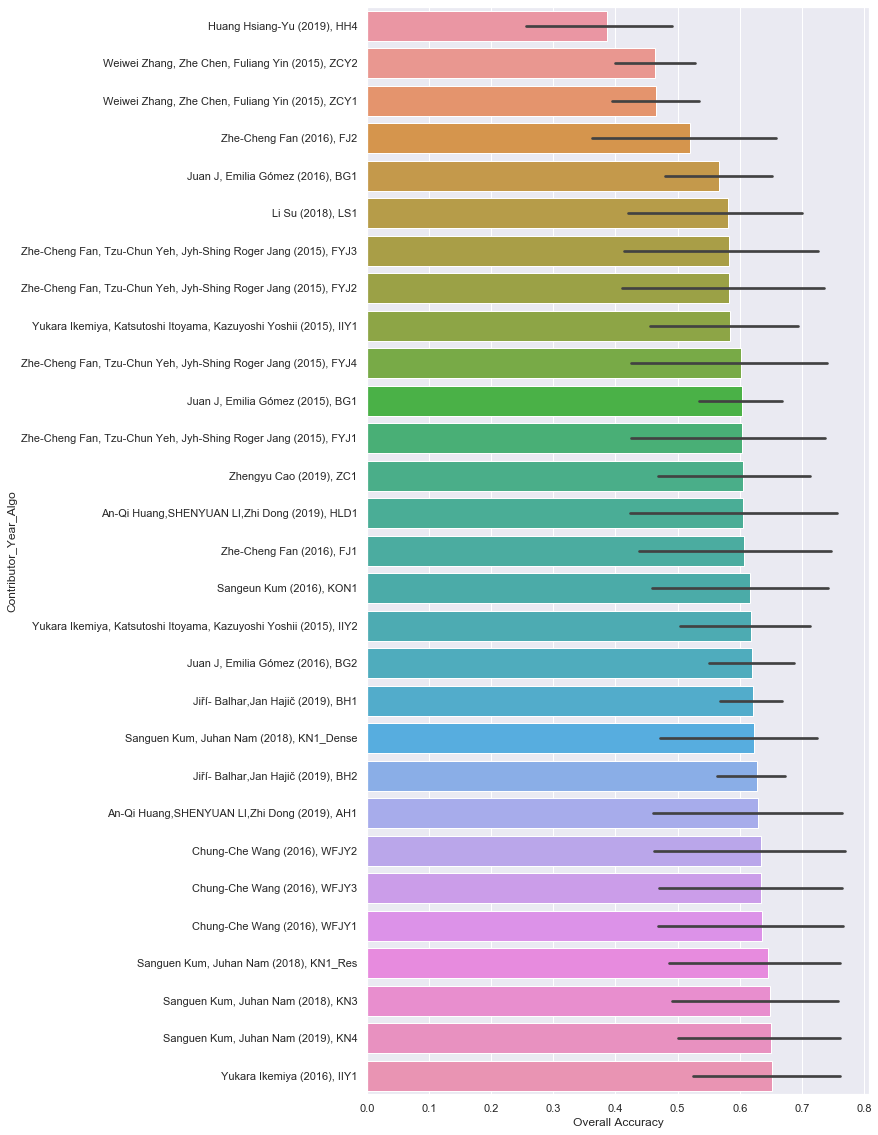

In [28]:
sns.set(rc={'figure.figsize':(9,20)})
#sns.barplot(y="Raw Pitch Accuracy", x="Dataset", hue="Contributor_Year", hue_order=order, data=data, estimator=np.max)
filtered = data[data.Year >= 2015]
# filtered = data[(data.Dataset != "ORCHSET") & (data.Year >= 2009)]
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(filtered)
order = filtered.groupby("Contributor_Year_Algo").mean().reset_index().sort_values(["Overall Accuracy"]).Contributor_Year_Algo.unique()
barplot = sns.barplot(x="Overall Accuracy",y="Contributor_Year_Algo", order=order, data=filtered, estimator=np.mean)
#for item in barplot.get_xticklabels():
#    item.set_rotation(90)

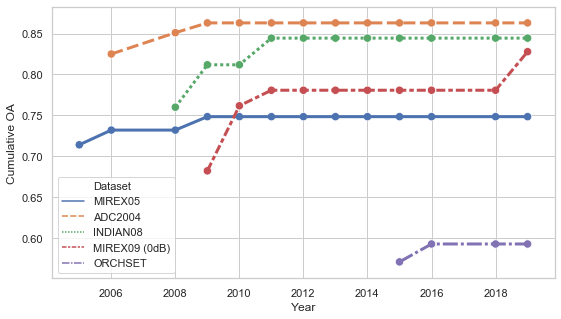

In [29]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(9,5)})
sns.set(style="whitegrid")

data = pd.read_csv("MIREX_RESULTS_2005-2019_RAW_DATA.csv")
data = data[data.Dataset != "MIREX09 (-5dB)"]
data = data[data.Dataset != "MIREX09 (+5dB)"]

data["Cumulative OA"] = data.sort_values(["Year"]).groupby(["Dataset"])["Overall Accuracy"].cummax()
plot_data = data.groupby(["Year", "Dataset"]).max().reset_index()
sns.lineplot(y="Cumulative OA", x="Year", hue="Dataset", style="Dataset", data=plot_data, linewidth=3)
# sns.lineplot(y="Overall Accuracy", x="Year", hue="Dataset", data=data.groupby(["Year", "Dataset"]).mean().reset_index(), alpha=0.3)
sns.scatterplot(y="Cumulative OA", x="Year", hue="Dataset", data=plot_data, legend=False, s=70)

#plt.savefig("mirex_results_cumulative.pdf", bbox_inches="tight")

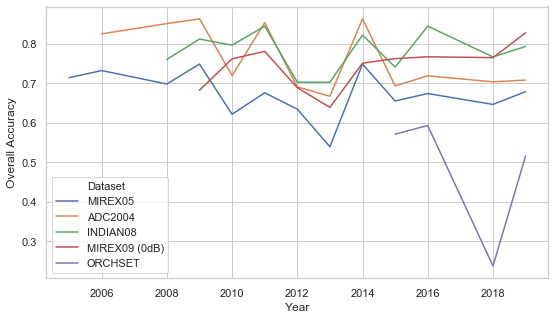

In [30]:
sns.lineplot(y="Overall Accuracy", x="Year", hue="Dataset", data=data.groupby(["Year", "Dataset"]).max().reset_index())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(data.Contributors.unique()).sort_values(0))

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data.groupby(["Year", "Contributors"]).mean())

In [ ]:
data.sort_values(["Year", "Contributors"]).Contributors.unique()

In [ ]:
a = data[~data.Algorithm.isin(["LPSL1", "brossier"])].groupby(["Dataset", "Contributors"]).max()["Overall Accuracy"].reset_index()
a[a.Dataset=="ADC2004"].sort_values("Overall Accuracy")